In [276]:
##　sqloggerで測定 2018/11/08　##

import numpy
import pandas
import matplotlib.pyplot
%matplotlib inline
from n2lite import n2lite

beam_list = ['2l', '2r', '3l', '3r',
                       '4l', '4r', '5l', '5r', 
                       '1lu', '1ll', '1ru', '1rl']
# read hot data

path = 'nasco_20181108_131612.db'

d = n2lite.N2lite('/home/amigos/data/sql/'+path)
D = d.read_pandas_all()

t = D['time']-D['time'][0]
print('経過時間:  ',"{0:.0f}".format(t[len(t)-1]/60),'分')

経過時間:   57 分


In [277]:
# set tuning param

initial_vg1 = -2.0
final_vg1 = 2.0
initial_vg2 = -2.0
final_vg2 = 2.0
step = 0.1
roop_vg1 = int((final_vg1- initial_vg1) / step) + 1
roop_vg2 = int((final_vg2- initial_vg2) / step) + 1
bins_vg1 = numpy.arange(initial_vg1, final_vg2 + 0.1, 0.1)
bins_vg2 = numpy.arange(initial_vg2, final_vg2 + 0.1, 0.1)

In [278]:
offset_hot_vg1 =  - (final_vg1 + numpy.mean(D['hemt_vg1_3l'][0:100]))
offset_hot_vg2 = - (final_vg2 + numpy.mean(D['hemt_vg2_3l'][0:100]))
D['hemt_vg1_3l'] = D['hemt_vg1_3l'] + offset_hot_vg1
D['hemt_vg2_3l'] = D['hemt_vg2_3l'] + offset_hot_vg2

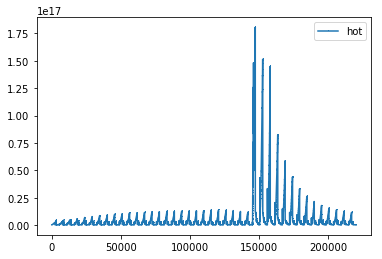

In [279]:
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(D['xffts_1'], label='hot', marker=',')
matplotlib.pyplot.legend()

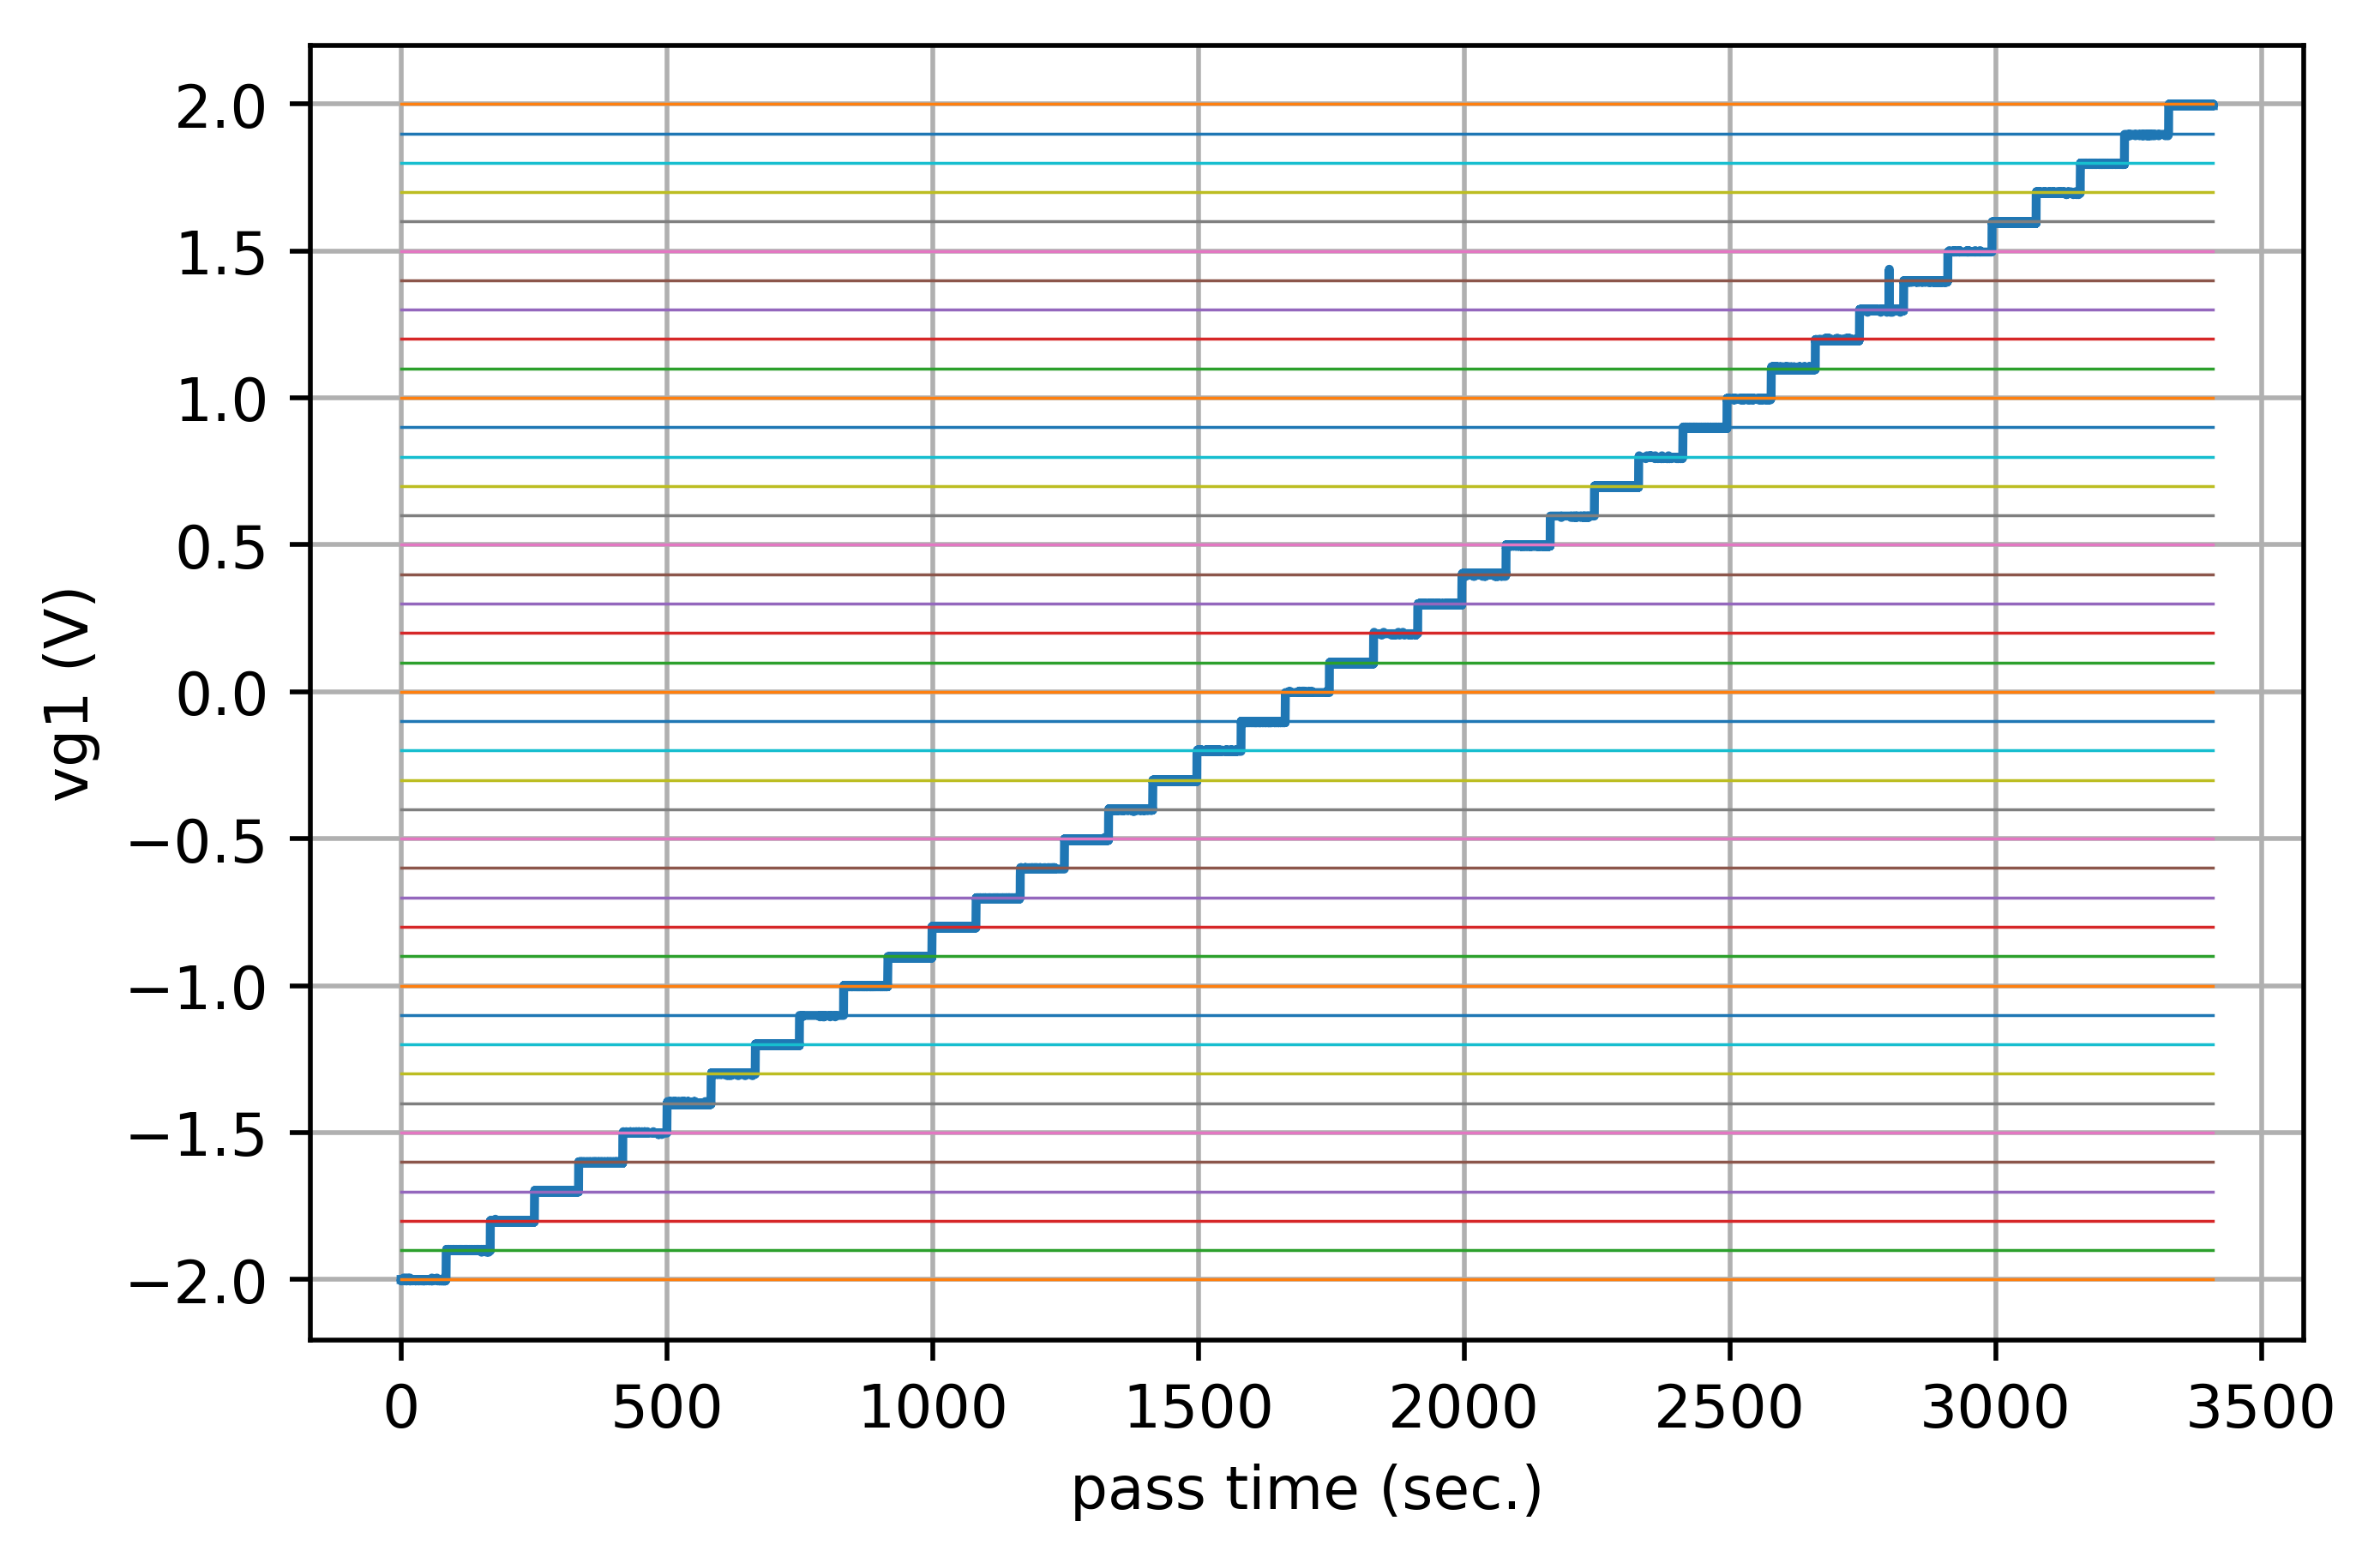

In [280]:
# check 3l hot vg1
matplotlib.pyplot.figure(dpi=500)
matplotlib.pyplot.plot(D['time']-D['time'][0], D['hemt_vg1_3l'])
matplotlib.pyplot.grid()
matplotlib.pyplot.xlabel('pass time (sec.)')
matplotlib.pyplot.ylabel('vg1 (V)')
for i in range(-20, 20 + 1):
    matplotlib.pyplot.plot([0, (D['time']-D['time'][0])[len(D['time'])-1]],[i*0.1, i*0.1], lw=0.5)

(-2.0, 2.0)

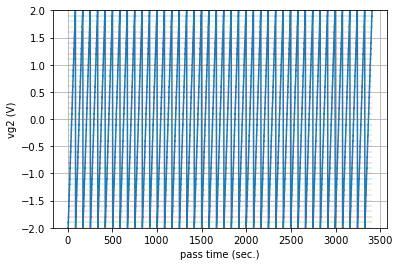

In [281]:
# check 3l hot vg2
matplotlib.pyplot.figure()
matplotlib.pyplot.plot(D['time']-D['time'][0], D['hemt_vg2_3l'])
matplotlib.pyplot.grid()
matplotlib.pyplot.xlabel('pass time (sec.)')
matplotlib.pyplot.ylabel('vg2 (V)')
for i in range(-20, 20 + 1):
    matplotlib.pyplot.plot([0, (D['time']-D['time'][0])[len(D['time'])-1]],[i*0.1, i*0.1], lw=0.3)
#for i in range(0, 850 * 2 + 1):
 #   matplotlib.pyplot.plot([i/2, i/2], [-2.0, 2.0], lw=0.3)
#matplotlib.pyplot.xlim(0, 100)
matplotlib.pyplot.ylim(-2.0 , 2.0)

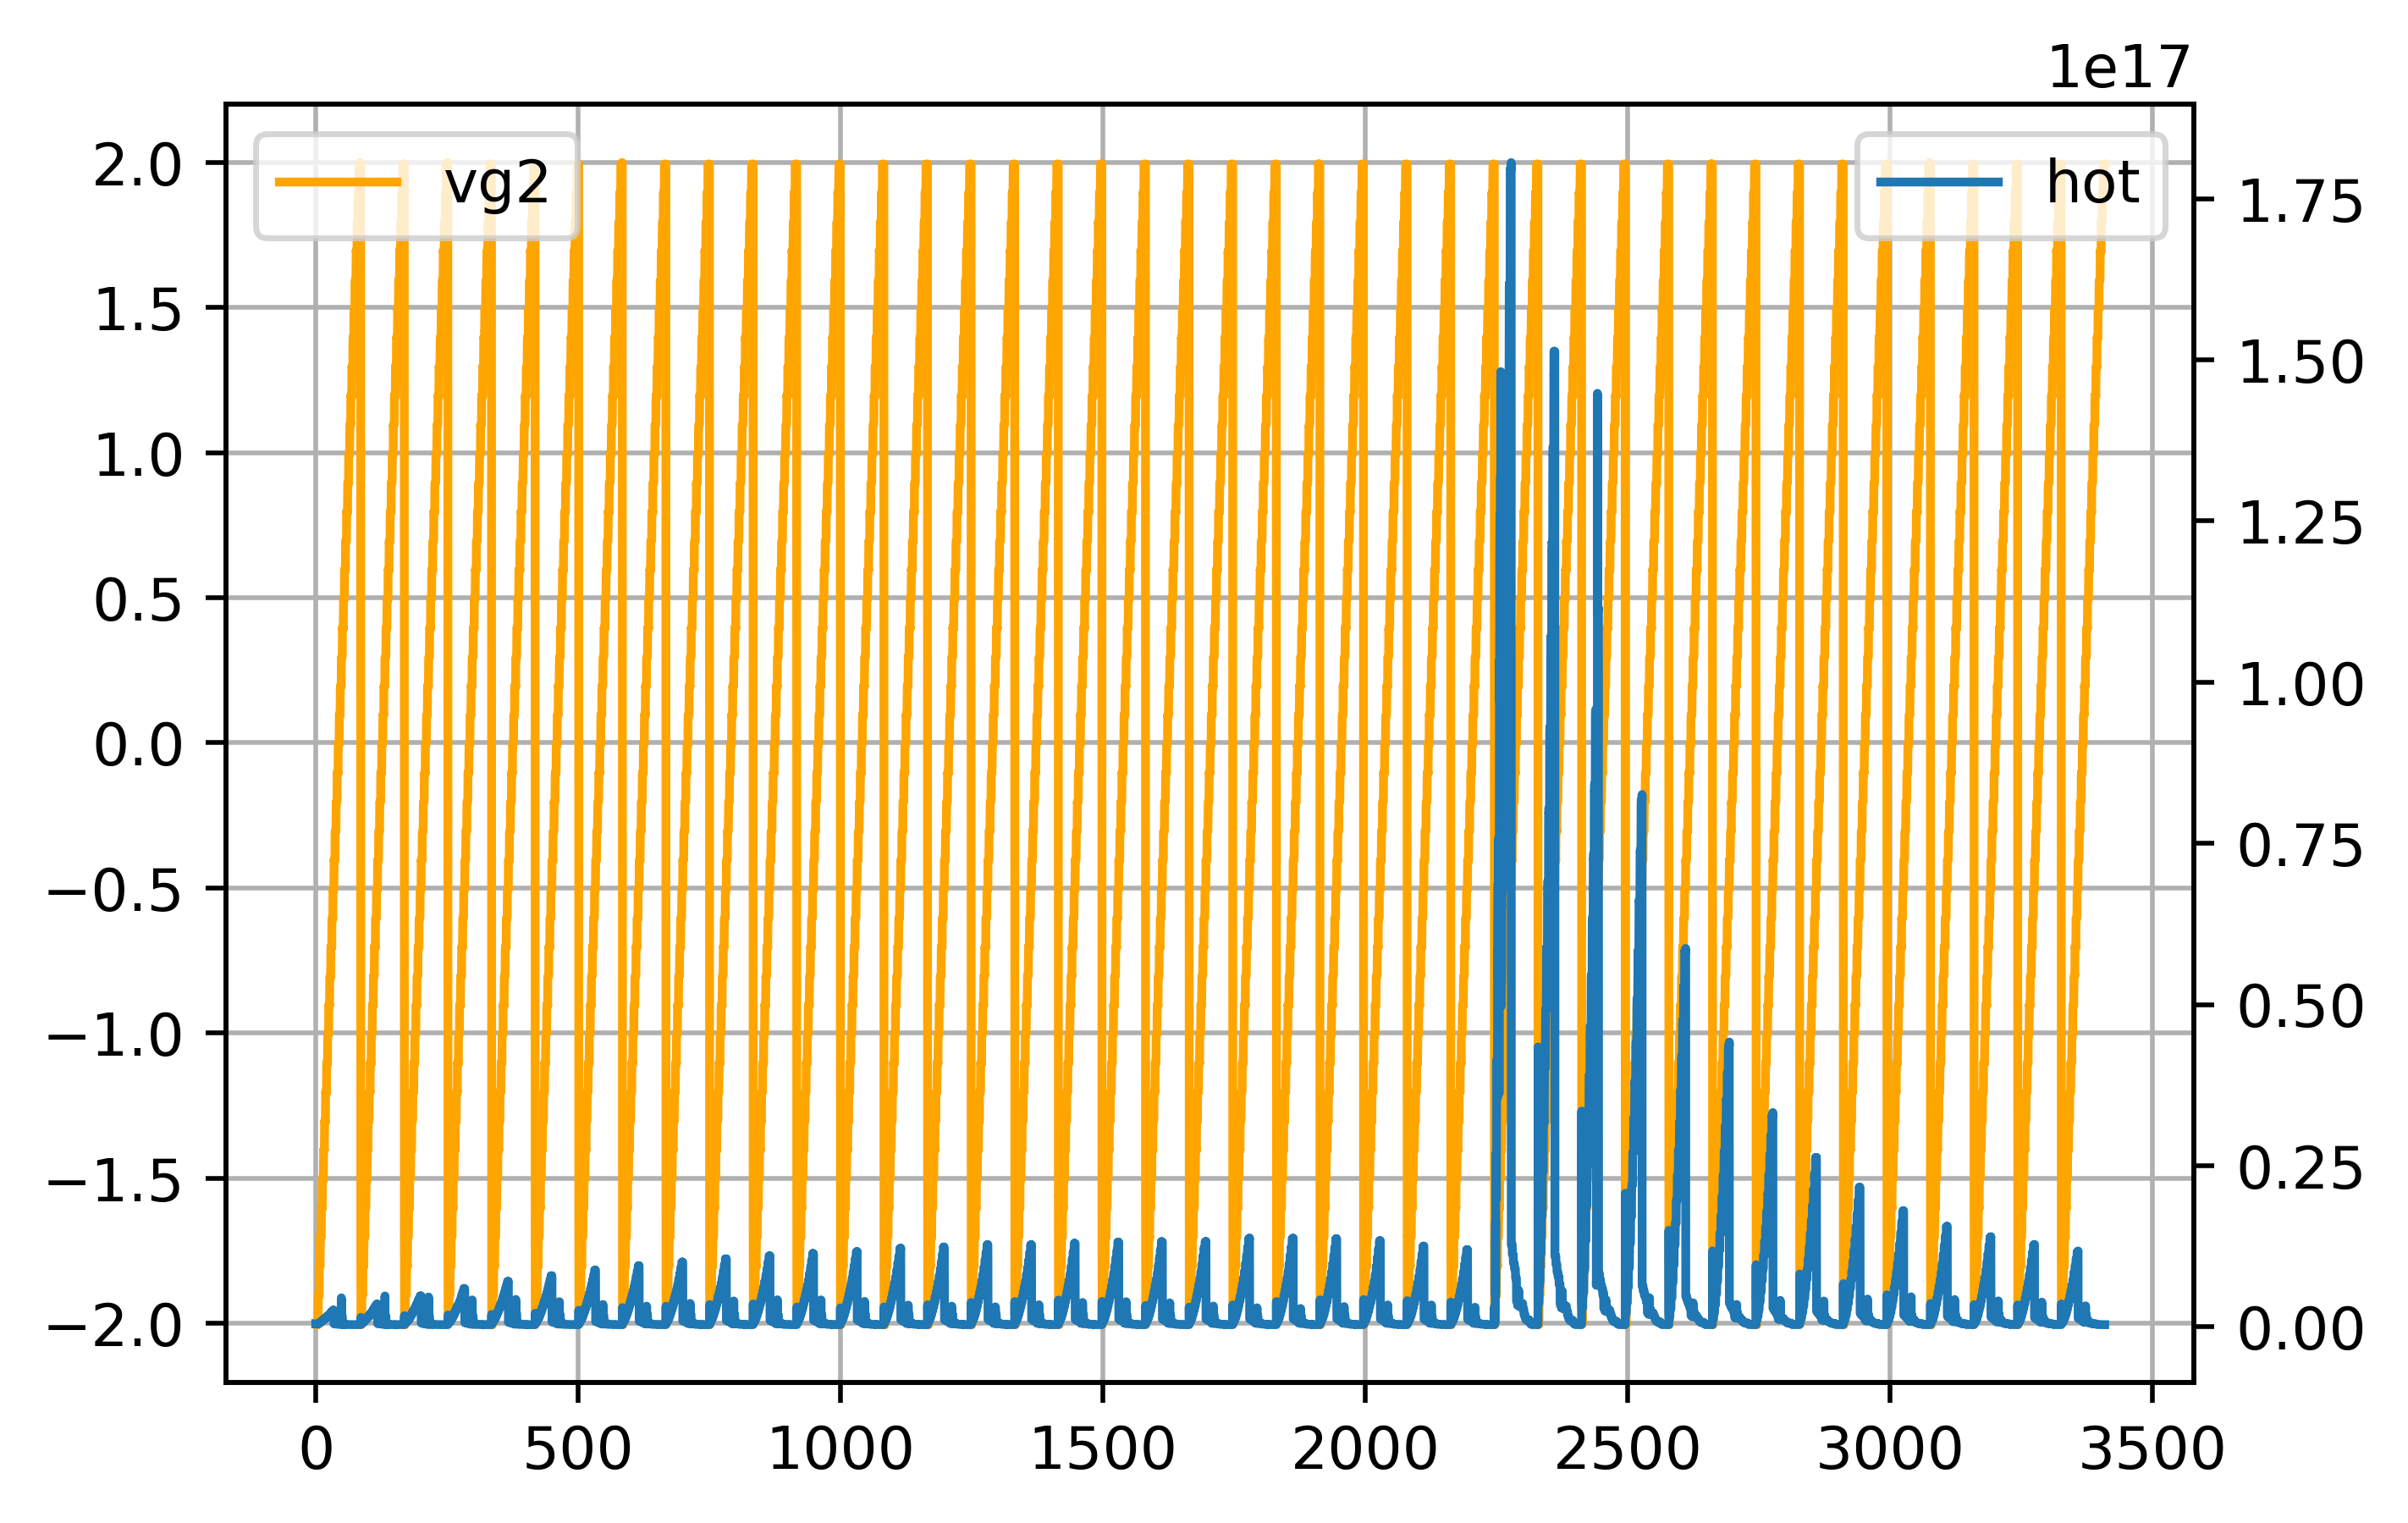

In [282]:
matplotlib.pyplot.figure(dpi=500)
ax = matplotlib.pyplot.subplot(111)
ax1 = ax.twinx()
ax.plot(D['time']-D['time'][0], D['hemt_vg2_3l'], c='orange', label='vg2')
ax1.plot(D['time']-D['time'][0], D['xffts_1'], label = 'hot')
matplotlib.pyplot.legend()
ax.legend(loc='upper left')
#matplotlib.pyplot.xlim(10, 15)
#ax.set_ylim(-0.5, 0.8)
ax.grid()

In [283]:
step = 0.1
def sort_vg1(x):
    mask = 0.01
    for i in range(len(bins_vg1)):
        if x >= bins_vg1[i] - mask and x < bins_vg1[i] + mask: return i
        continue
def sort_vg2(x):
    mask = 0.01
    for i in range(len(bins_vg2)):
        if x >= bins_vg2[i] - mask and x < bins_vg2[i] + mask: return i
        continue

In [284]:
D['x'] = D['hemt_vg1_3l'].apply(sort_vg1)
D['y'] = D['hemt_vg2_3l'].apply(sort_vg2)

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
5          0.0
6          0.0
7          0.0
8          0.0
9          0.0
10         0.0
11         0.0
12         0.0
13         0.0
14         0.0
15         0.0
16         0.0
17         0.0
18         0.0
19         0.0
20         0.0
21         0.0
22         0.0
23         0.0
24         0.0
25         0.0
26         0.0
27         0.0
28         0.0
29         0.0
          ... 
220031    40.0
220032    40.0
220033    40.0
220034    40.0
220035    40.0
220036    40.0
220037    40.0
220038    40.0
220039    40.0
220040    40.0
220041    40.0
220042    40.0
220043    40.0
220044    40.0
220045    40.0
220046    40.0
220047    40.0
220048    40.0
220049    40.0
220050    40.0
220051    40.0
220052    40.0
220053    40.0
220054    40.0
220055    40.0
220056    40.0
220057    40.0
220058    40.0
220059    40.0
220060    40.0
Name: x, Length: 220061, dtype: float64

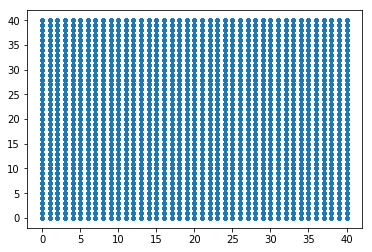

In [268]:
matplotlib.pyplot.plot(D['x'],D['y'],'.')
#matplotlib.pyplot.xlim(0,5)
#matplotlib.pyplot.ylim(30,50)
matplotlib.pyplot.show()

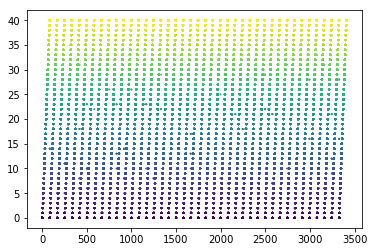

In [269]:
matplotlib.pyplot.scatter(D['time']-D['time'][0], D['y'], c=D['y'], s=1)
matplotlib.pyplot.show()

In [289]:
_a = [[(D['xffts_1'][D['y'] == _y][D['x'] == _x]) for _y in range(41)] for _x in range(41)]
a = [[[numpy.mean(_a[j][i])] for i in range(41) ] for j in range(41)]

[[[459051821776742.9],
  [536843610445578.9],
  [635440163721303.2],
  [753796909379031.2],
  [882671604075492.4],
  [1020152073663745.1],
  [1153577883466794.8],
  [1288260497232976.2],
  [1427056981115367.0],
  [1571358916976161.8],
  [1715203789946018.5],
  [1877918077964639.0],
  [2047783816226822.2],
  [2250011726309886.8],
  [2408798636358734.5],
  [2588710575590596.5],
  [460457580677616.44],
  [440909056835339.0],
  [425427109336181.3],
  [416781825026398.4],
  [404210176613047.7],
  [384877635828615.9],
  [370065929263483.44],
  [1840514069112380.0],
  [360827215400880.9],
  [360348011058964.25],
  [439564588864394.7],
  [358394647856470.1],
  [352392796835430.9],
  [349050733952357.56],
  [347666225935657.9],
  [348743384704269.56],
  [352526226665763.6],
  [358868157356181.1],
  [343627135237665.8],
  [339378939064041.6],
  [337937285763372.4],
  [337058025360446.2],
  [336540759435425.25],
  [336282563360292.94],
  [336112466070954.25]],
 [[493727102620995.56],
  [598676257

In [226]:
vg1 = [[[numpy.mean(D['hemt_vg1_3l'][D['x']== _x][D['y']== _y])] for _y in range(41) ] for _x in range(41)]
vg2 = [[[numpy.mean(D['hemt_vg2_3l'][D['x']== _x][D['y']== _y])] for _y in range(41) ] for _x in range(41)]

In [286]:
vg1

[[[-1.9999760465801986],
  [-1.9999023437499968],
  [-1.9999911221590874],
  [-1.9999911221590874],
  [-2.000007728192444],
  [-1.999774966032605],
  [-1.9999903223536],
  [-2.000020001882527],
  [-1.9999023437499972],
  [-2.0000124823778167],
  [-1.999902343749996],
  [-1.9999023437499965],
  [-1.9999810987903188],
  [-1.9999023437499968],
  [-2.000030838815786],
  [-2.0000767299107105],
  [-1.9999023437499963],
  [-2.0000883556547584],
  [-1.999953206380205],
  [-2.0001161895529176],
  [-2.0001736111111077],
  [-1.9999023437499963],
  [-1.9999895368303535],
  [-1.9999023437499963],
  [-1.9999023437499963],
  [-2.000065104166663],
  [-1.9999023437499963],
  [-2.000137094350958],
  [-1.9999502144607808],
  [-1.999902343749996],
  [-1.9999023437499963],
  [-1.9999023437499965],
  [-1.9998174252717353],
  [-1.9999560010302166],
  [-1.9999944722877323],
  [-1.9999971556432004],
  [-2.0002173639112866],
  [-2.0000848787967254],
  [-2.0000431941105736],
  [-2.000137094350958],
  [-1.9999999

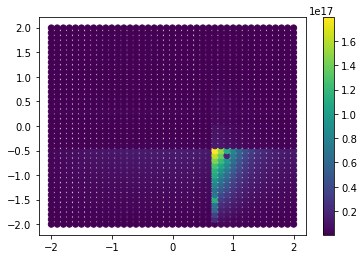

In [255]:
matplotlib.pyplot.scatter(vg1, vg2, c=a)
#matplotlib.pyplot.clim(5e16,2e17)
matplotlib.pyplot.colorbar()

In [138]:
_hot_vg1 = [[D['hemt_vg1_3l'][__idx] for __idx in _idx] for _idx in idx_hot]
_hot_vg2 = [[D['hemt_vg2_3l'][__idx] for __idx in _idx] for _idx in idx_hot]
_power_hot = [[D['xffts_1'][__idx] for __idx in _idx] for _idx in idx_hot]

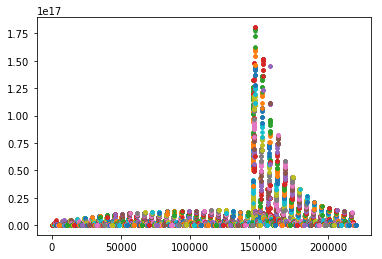

In [139]:
[[matplotlib.pyplot.plot(_power_hot[j][i], '.') for i in range(41)] for j in range(41) ]
#[matplotlib.pyplot.plot(_power_cold[28][i], '.') for i in range(41)]
matplotlib.pyplot.show()

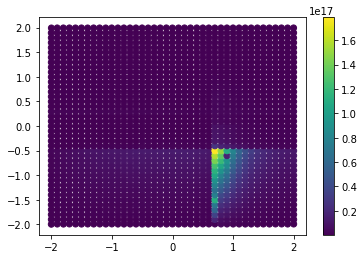

In [140]:
amp = [[_power_hot[j][i]  for i in range(41)] for j in range(41)]
amp_ave = [[numpy.mean(_power_hot[j][i])  for i in range(41)] for j in range(41)]
hot_vg1_ave = [[numpy.mean(_hot_vg1[j][i]) for i in range(41)] for j in range(41)]
hot_vg2_ave = [[numpy.mean(_hot_vg2[j][i]) for i in range(41)] for j in range(41)]
matplotlib.pyplot.scatter(hot_vg1_ave, hot_vg2_ave, c=amp_ave)
matplotlib.pyplot.colorbar()

In [213]:
len(hot_vg1_ave)

41

In [215]:
vg1 = [[_hot_vg1[i][j].mean() for j in range(41)]for i in range(41)]
vg2 = [[_hot_vg2[i][j].mean() for j in range(41)]for i in range(41)]
power_hot = [[_power_hot[i][j].mean() for j in range(41)]for i in range(41)]
base = min(min(power_hot))
amp = [[power_hot[i][j] - base for j in range(41)]for i in range(41)]

In [216]:
len(vg1)

41

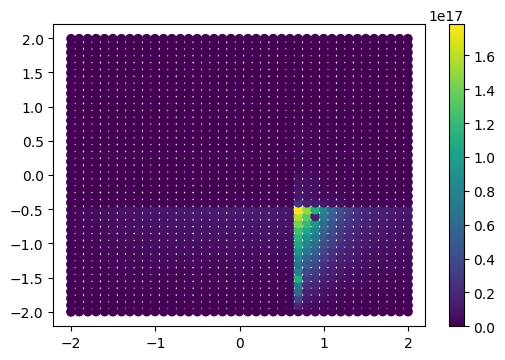

In [142]:
matplotlib.pyplot.figure(dpi=100)
matplotlib.pyplot.scatter(vg1, vg2, c=amp)
# matplotlib.pyplot.clim(10, 35)
matplotlib.pyplot.colorbar()